# IMDB
IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows.

Data Source: 
[IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

<img src="imdb1.jpg" alt="drawing" width="1000" height="100" align = "left">

# Objectives

- Perform Feature Engineering, clean, wraggling and tidy then save the new dataset in a .csv file. The new file will be use in machine learning model, KNN and Decision Tree.




Data Dictionary:
- `Poster_Link` - Link of the poster that imdb using
- `Series_Title` = Name of the movie
- `Released_Year` - Year at which that movie released
- `Certificate` - Certificate earned by that movie
- `Runtime` - Total runtime of the movie
- `Genre` - Genre of the movie
- `IMDB_Rating` - Rating of the movie at IMDB site
- `Overview` - mini story/ summary
- `Meta_score` - Score earned by the movie
- `Director` - Name of the Director
- `Star1,Star2,Star3,Star4` - Name of the Stars
- `Noofvotes` - Total number of votes
- `Gross` - Money earned by that movie

# Feature Engineering

Content:

1. Import Packages and Load Data
2. Converting to Appropriate Data Types
3. Check for Null Values (Nan and zero value, impute if necessary)
4. Outliers (impute if necessary)
5. Conclusion


# 1. Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

C:\Users\Toto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Show initial dataset 

In [2]:
# define training points and training labels
df = pd.read_csv('imdb_top_1000.csv')
print(df.shape)
df.head(2)

(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [3]:
# Inpsecting columns
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#### Drop unnecessary columns

In [4]:
df = df.drop(columns=['Poster_Link', 'Overview'])

# 2. Converting to Appropriate Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


We will convert the `Released_Year`, `Runtime`, and `Gross` to integer data types.

### Released_Year to Integer

In [6]:
# showing the string in 'Release_Year'
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Since only 1 row have missing value, let's look at it. We need to convert this 'PG' to an integer data type.

In [7]:
# Show detailed information
df[df['Released_Year'].isin(['PG'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


After conducting a reseach about the `Apollo 13` movie. We  found out that the release date was November 15, 1995.
We will replace `PG` with the year `1995`.

In [8]:
# replce 'PG' with 1995 and convert to integer
df['Released_Year'] = df['Released_Year'].replace(['PG'] , 1995).astype(int)
df.iloc[[966]]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


###  Runtime to Integer

In [9]:
df.Runtime.unique()[0:10]

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min'], dtype=object)

Before converting to integer, we need to split the observations and remove the string keyword 'min'.

In [10]:
# remove 'min' keyword and convert to int.
df['Runtime'] = df['Runtime'].str.rstrip('min').astype('int')

###  Gross to Integer

In [11]:
# Remove comma
df['Gross'] = df['Gross'].str.replace(',', '').astype('float')

Final checking for datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 101.7+ KB


# 3. Check for Null Values

In [13]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

We have null values in Certificate, Meta_score, and Gross columns let's check and convert these null to an aggregate value.

### Certificate null values
Note: `Certicates` are movies restriction for audinece:
- U is unrestricted, suitable for anyone
- A adult only, indicate films high in violence or mature content that should not be marketed to teenagers 

In [14]:
# unique values
df.Certificate.unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

Since we dont know the certificate of these movies  and we dont want to replace it with the most occurence value,  we will just tag this as `Unrated`. Maybe it's null because these movies are not rated yet. Some further investegation is needed for this scenario.

In [15]:
# Replace nan with 'Unrated'
df.Certificate = df.Certificate.fillna('Unrated')

### Meta_score null values

In [16]:
df.Meta_score.unique()

array([ 80., 100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,
        73.,  83.,  nan,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,
        88.,  57.,  67.,  62.,  77.,  64.,  75.,  97.,  99.,  78.,  68.,
        81.,  95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,
        72.,  60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,
        44.,  45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

There are 157 nan values in our Meta_score. We can replace this by it's median or mean. For now let's replace it with the mean value.

In [17]:
df.Meta_score = round(df.Meta_score.fillna((df.Meta_score.mean())))

In [18]:
df.Meta_score.unique()

array([ 80., 100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,
        73.,  83.,  78.,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,
        88.,  57.,  67.,  62.,  77.,  64.,  75.,  97.,  99.,  68.,  81.,
        95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,  72.,
        60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,  44.,
        45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

### Gross null values

There are 169 null values in `Gross`. With our general knowledge we know that 'gross' is an important feature and we can't safely delete rows with null value that are more than 5%. 

We have two methods we can apply to replace this null;

1.  Replace with the mean value of our total `Gross`.
2.  Replace with some aggregated value. In this case the mean of it's belong category in  `IMDB_Rating`.

We have both codes below, but since we are preaparing this dataset for KNN classification, it's better to replace it with method number 2.

In [19]:
# # Replace Nan with zero
df['Gross'].fillna(0, inplace = True)

# # Change type to int
df['Gross'] = df['Gross'].astype(int)

# Method 2
# # Repalce zero with Gross mean
# df['Gross'] = df['Gross'].replace([0], np.mean(df.Gross))

I know my code for this is super messy, bear with it for now so we can proceed with our analysis. We will replace this code in the near future.. ;)

In [20]:
# Method 2
# Subsets by IMDB_Rating
# Replace zero gross value by its IMDB Rating mean

s76 = df[df['IMDB_Rating'].isin(['7.6'])]
s76['Gross'] =  s76['Gross'].replace([0], np.mean(s76.Gross))

s77 = df[df['IMDB_Rating'].isin(['7.7'])]
s77['Gross'] =  s77['Gross'].replace([0], np.mean(s77.Gross))

s78 = df[df['IMDB_Rating'].isin(['7.8'])]
s78['Gross'] =  s78['Gross'].replace([0], np.mean(s78.Gross))

s79 = df[df['IMDB_Rating'].isin(['7.9'])]
s79['Gross'] =  s79['Gross'].replace([0], np.mean(s79.Gross))

s80 = df[df['IMDB_Rating'].isin(['8.0'])]
s80['Gross'] =  s80['Gross'].replace([0], np.mean(s80.Gross))

s81 = df[df['IMDB_Rating'].isin(['8.1'])]
s81['Gross'] =  s81['Gross'].replace([0], np.mean(s81.Gross))

s82 = df[df['IMDB_Rating'].isin(['8.2'])]
s82['Gross'] =  s82['Gross'].replace([0], np.mean(s82.Gross))

s83 = df[df['IMDB_Rating'].isin(['8.3'])]
s83['Gross'] =  s83['Gross'].replace([0], np.mean(s83.Gross))

s84 = df[df['IMDB_Rating'].isin(['8.4'])]
s84['Gross'] =  s84['Gross'].replace([0], np.mean(s84.Gross))

s85 = df[df['IMDB_Rating'].isin(['8.5'])]
s85['Gross'] =  s85['Gross'].replace([0], np.mean(s85.Gross))

s86 = df[df['IMDB_Rating'].isin(['8.6'])]
s86['Gross'] =  s86['Gross'].replace([0], np.mean(s86.Gross))

s87 = df[df['IMDB_Rating'].isin(['8.7'])]
s87['Gross'] =  s87['Gross'].replace([0], np.mean(s87.Gross))

s88 = df[df['IMDB_Rating'].isin(['8.8'])]
s88['Gross'] =  s88['Gross'].replace([0], np.mean(s88.Gross))

s89 = df[df['IMDB_Rating'].isin(['8.9'])]
s89['Gross'] =  s89['Gross'].replace([0], np.mean(s89.Gross))

s90 = df[df['IMDB_Rating'].isin(['9.0'])]
s90['Gross'] =  s90['Gross'].replace([0], np.mean(s90.Gross))

s92 = df[df['IMDB_Rating'].isin(['9.2'])]
s92['Gross'] =  s92['Gross'].replace([0], np.mean(s92.Gross))

s93 = df[df['IMDB_Rating'].isin(['9.3'])]
s93['Gross'] =  s93['Gross'].replace([0], np.mean(s93.Gross))   

### Saving our new dataset to a new variable `df_new`

In [21]:
# concatenate all subsets
df_new = pd.concat([s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s92,s93], ignore_index=True, axis=0)
df_new.shape

(1000, 14)

Show information of our new dataframe

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     1000 non-null   float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          1000 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 101.7+ KB


Check for duplicates

In [23]:
#count duplicates
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0


Our new dataset is almost ready, one final step is to check for the outliers.

# 4. Outliers

There's a lot of technique on how to identify the outliers, However the hardest part is the decision making on what to do with them. Unfortunately, there is no straightforward “best” solution for dealing with outliers "NO Free Lunch" because it depends on the severity of outliers and the goals of the analysis.

Remember, sometimes leaving out the outliers in the data is acceptable and other times they can negatively impact analysis and modeling so they should be dealt with by feature engineering. It all depends on the goals of the analysis and the severity of the outliers.

In [24]:
#define functions
def showoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        return outliers
    
def countoutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        count = len(outliers)
        return {column_name : count}
    
def Replace_Outliers(df_name, value, column_name = ""):
    iqr = df_name[column_name].quantile(.75) - df_name[column_name].quantile(.25)
    
    lowerbound = (df_name[column_name].quantile(.25)) - iqr * 1.5
    upperbound = (df_name[column_name].quantile(.75)) + iqr * 1.5
            
    df_name[column_name] = np.where(df_name[column_name] > upperbound, value, df_name[column_name])
    df_name[column_name] = np.where(df_name[column_name] < lowerbound, value, df_name[column_name])

In [25]:
# create a dataset with only numeric values
df_n = df_new.select_dtypes(include=np.number)

### Number of ouliers per column

In [26]:
column_list = df_n.columns
column_list = np.array(column_list)
for i in column_list:
    print (countoutliers(df_n, i))

{'Released_Year': 7}
{'Runtime': 29}
{'IMDB_Rating': 13}
{'Meta_score': 31}
{'No_of_Votes': 67}
{'Gross': 116}


### Outliers percentage

We likely to replace outliers that have very low proportion in our data set

In [28]:
for i in column_list:
    col = i
    perc = countoutliers(df_n, i)[i] / len(df_n)
    print (col + ': ' + str('{:.2f}'.format(perc*100)) + '%') 

Released_Year: 0.70%
Runtime: 2.90%
IMDB_Rating: 1.30%
Meta_score: 3.10%
No_of_Votes: 6.70%
Gross: 11.60%


### Visualize outliers in boxplot

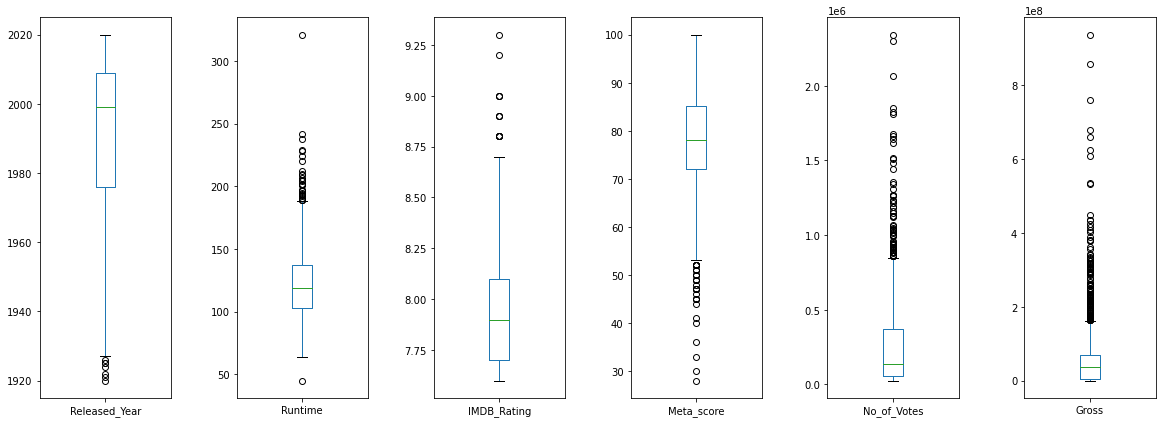

In [29]:
df_n.plot(kind='box', 
          subplots=True, 
          sharey=False, 
          figsize=(20, 7))
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 

### Summary Statistic

In [30]:
df_n.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,77.976000,2.736929e+05,6.556885e+07
std,23.285669,28.093671,0.275491,11.362065,3.273727e+05,1.003734e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,78.000000,1.385485e+05,3.767117e+07
75%,2009.000000,137.000000,8.100000,85.250000,3.741612e+05,6.806557e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


Now that we have all the outliers necessary details and since we were preparing this dataset for our machine learning model, we will replace outliers with some value:

- `Released_Year:` replace with 25 percentile
- `Runtime:` retain
- `IMDB_Rating:` retain
- `Meta_score:` retain
- `No_of_Votes:` retain
- `Gross:` retain


### Release_Year Outliers

In [31]:
# replace released year outliers with 25 percentile
Replace_Outliers(df_new, 
                 df_new['Released_Year'].quantile(0.25),
                 'Released_Year')

# uncomment for changing outliers for other columns
# Replace_Outliers(df_new, 119, 'Runtime')
# Replace_Outliers(df_new, 7.9, 'IMDB_Rating')
# Replace_Outliers(df_new, 78, 'Meta_score')
# Replace_Outliers(df_new, df_new.No_of_Votes.mean(), 'No_of_Votes')
# Replace_Outliers(df_new, df_new.Gross.mean(), 'Gross')

### Correlations Before and After Replacing Outliers Value

<AxesSubplot:>

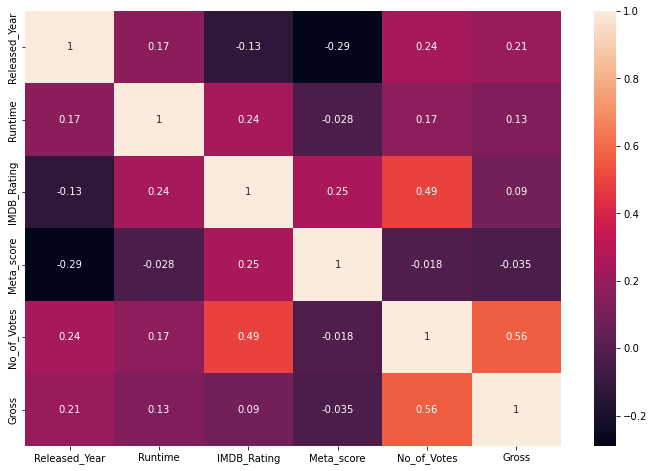

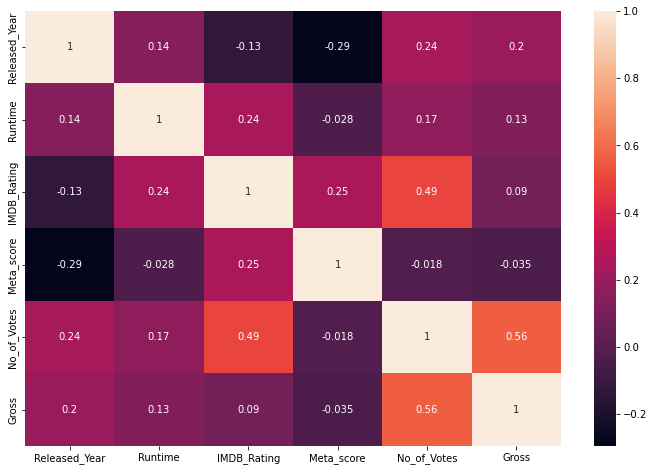

In [32]:
# Using df_n
plt.figure(figsize=(12, 8)) 
corr_matrix = df_n.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

# # Using df_new
plt.figure(figsize=(12, 8)) 
corr_matrix = df_new.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

Replacing all outliers has negative impact in correlation, so we decided to leave most our data as is.

### Saving our new df_new dataset in .csv file

In [ ]:
# df_new.to_csv("imdb_top_1000_clean.csv")

In [36]:
# show cleaned dataset
df_clean = pd.read_csv('imdb_top_1000_clean.csv')
df_clean.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,Dark Waters,2019.0,PG-13,126,"Biography, Drama, History",7.6,73.0,Todd Haynes,Mark Ruffalo,Anne Hathaway,Tim Robbins,Bill Pullman,60408,6.212517e+07
1,1,Searching,2018.0,U/A,102,"Drama, Mystery, Thriller",7.6,71.0,Aneesh Chaganty,John Cho,Debra Messing,Joseph Lee,Michelle La,140840,2.602096e+07
2,2,Once Upon a Time... in Hollywood,2019.0,A,161,"Comedy, Drama",7.6,83.0,Quentin Tarantino,Leonardo DiCaprio,Brad Pitt,Margot Robbie,Emile Hirsch,551309,1.425027e+08


# 5. Conclusion

The focus of this analysis is to prepare our dataset for machine learning model. We have done the following:

1. We have convert wrong data type columns to appropriate type.
2. Impute null values
3. impute outliers


Now we have a clean dataset saved as `imdb_top_1000_clean.csv`. We can now start our analysis, univariate, bivariate, multivariate, feature selection and build a machine learning model.


\-fin